In [1]:
import torch

In [10]:
rand = torch.randn(100) * 10
rand


tensor([  8.6856, -14.0871,   5.2689,  -4.3717,  -7.0248, -11.3962,  25.2688,
          1.9286,  -2.1438,   8.8616, -10.7802, -23.0582,   7.6519,  -8.0404,
         10.6288,  -7.5920,   4.1610,   6.8522,  15.1354,   1.8797,  -4.4667,
          0.8942,   3.4346,  -9.3776,   5.2056, -11.3182,  27.1344,  -1.6070,
          6.6506,   8.4480,   8.3334,  12.3436,   3.8646, -16.8313,   8.2036,
         -6.0817,  -5.9042,   3.7974,   8.3518,  -4.0794,   4.4159,   3.1051,
         -9.9202,  -4.2616,  -9.1540,  19.4604,   3.0668,   3.9957,  14.5298,
         11.1074,   0.3519,   5.9414,  -6.9997,   8.2077,  10.4713,  12.8122,
         -3.0711,  -0.8524,  12.4778,  -4.4817,   8.1824,   6.1470,  -9.1043,
         -5.4027,  10.4834,   5.2650, -15.6905,   5.6862,  -4.2693,   7.6423,
        -20.7795,  -7.3492,   2.0748,   7.1085, -23.2349,  10.9479,  -4.7195,
         -4.0663,  16.6568,   6.0016, -16.0996,  -8.0747,  10.2735,   3.6590,
         -9.3392,  10.4549,  -4.0845,   9.1743,  -9.4805,  -1.03

In [12]:
x = torch.linspace(0, 100, 100).type(torch.FloatTensor)
x

tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

In [13]:
y = x + rand

In [14]:
y 

tensor([  8.6856, -13.0770,   7.2891,  -1.3414,  -2.9844,  -6.3457,  31.3294,
          8.9993,   5.9370,  17.9525,  -0.6792, -11.9471,  19.7731,   5.0909,
         24.7702,   7.5595,  20.3226,  24.0239,  33.3173,  21.0716,  15.7353,
         22.1064,  25.6568,  13.8547,  29.4480,  13.9343,  53.3971,  25.6658,
         34.9335,  37.7409,  38.6365,  43.6567,  36.1878,  16.5020,  42.5471,
         29.2718,  30.4594,  41.1711,  46.7357,  35.3145,  44.8199,  44.5193,
         32.5041,  39.1727,  35.2905,  64.9150,  49.5314,  51.4704,  63.0147,
         60.6024,  50.8569,  57.4565,  45.5255,  61.7430,  65.0167,  68.3677,
         53.4946,  56.7234,  71.0637,  55.1142,  68.7884,  67.7631,  53.5220,
         58.2337,  75.1299,  70.9216,  50.9761,  73.3630,  64.4176,  77.3393,
         49.9276,  64.3679,  74.8020,  80.8459,  51.5126,  86.7054,  72.0482,
         73.7114,  95.4447,  85.7995,  64.7085,  73.7435,  93.1017,  87.4974,
         75.5092,  96.3135,  82.7842,  97.0531,  79.4084,  88.86

In [15]:
x_train = x[:-10]
y_train = y[:-10]

x_test = x[-10:]
y_test = y[-10:]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

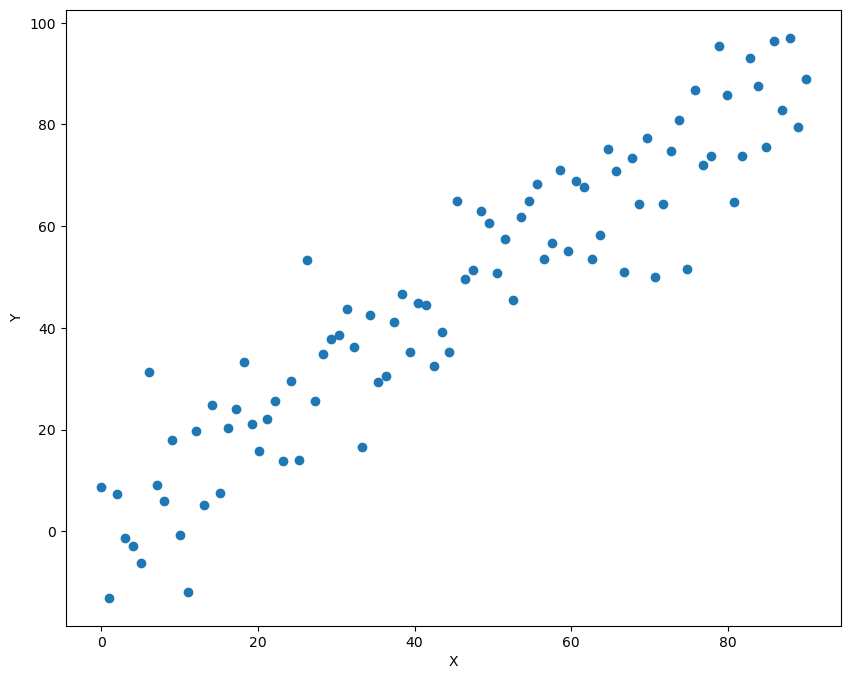

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [23]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
learning_rate = 0.0001


In [25]:
for i in range(1000):
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    loss = torch.mean((predictions - y_train) ** 2)
    print(i, ": loss is ", loss)
    
    loss.backward()
    
    a.data.add_(-learning_rate * a.grad.data)
    b.data.add_(-learning_rate * b.grad.data)
    
    a.grad.data.zero_()
    b.grad.data.zero_()

0 : loss is  tensor(1448.2921, grad_fn=<MeanBackward0>)
1 : loss is  tensor(382.4650, grad_fn=<MeanBackward0>)
2 : loss is  tensor(158.8582, grad_fn=<MeanBackward0>)
3 : loss is  tensor(111.9463, grad_fn=<MeanBackward0>)
4 : loss is  tensor(102.1043, grad_fn=<MeanBackward0>)
5 : loss is  tensor(100.0395, grad_fn=<MeanBackward0>)
6 : loss is  tensor(99.6063, grad_fn=<MeanBackward0>)
7 : loss is  tensor(99.5153, grad_fn=<MeanBackward0>)
8 : loss is  tensor(99.4963, grad_fn=<MeanBackward0>)
9 : loss is  tensor(99.4922, grad_fn=<MeanBackward0>)
10 : loss is  tensor(99.4913, grad_fn=<MeanBackward0>)
11 : loss is  tensor(99.4911, grad_fn=<MeanBackward0>)
12 : loss is  tensor(99.4910, grad_fn=<MeanBackward0>)
13 : loss is  tensor(99.4910, grad_fn=<MeanBackward0>)
14 : loss is  tensor(99.4909, grad_fn=<MeanBackward0>)
15 : loss is  tensor(99.4909, grad_fn=<MeanBackward0>)
16 : loss is  tensor(99.4909, grad_fn=<MeanBackward0>)
17 : loss is  tensor(99.4908, grad_fn=<MeanBackward0>)
18 : loss is 

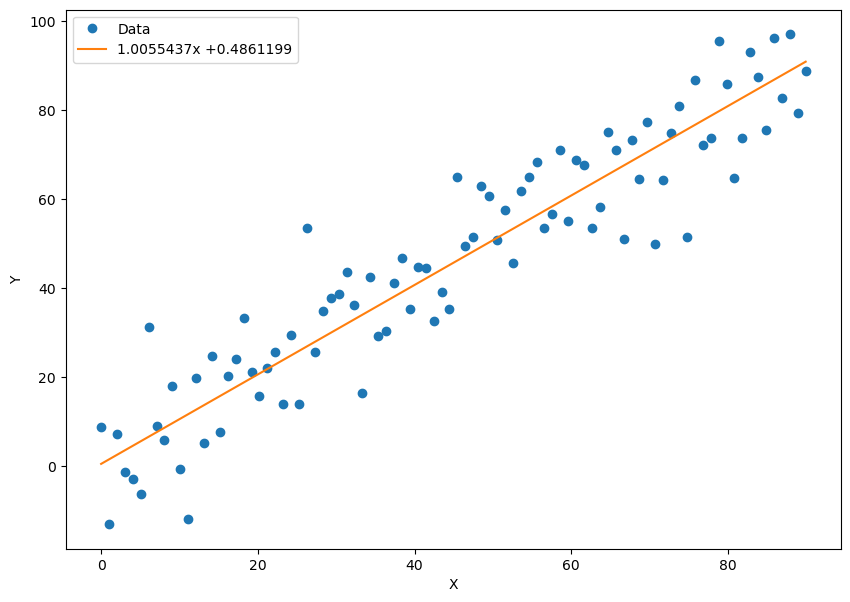

In [26]:
x_data = x_train.numpy()
plt.figure(figsize=(10, 7))
xplot, = plt.plot(x_data, y_train.data.numpy(), 'o')
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()

In [27]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

tensor([ 91.8992,  92.9149,  93.9306,  94.9463,  95.9620,  96.9777,  97.9934,
         99.0091, 100.0248, 101.0405], grad_fn=<AddBackward0>)

In [31]:
for i in range(10):
    print("loss " + str(i) + ": " + str(predictions.data.numpy()[i] - y_test.data.numpy()[i]))

loss 0: -1.4731445
loss 1: 12.451813
loss 2: -9.252953
loss 3: 16.552475
loss 4: 10.461449
loss 5: -2.8534927
loss 6: 6.17276
loss 7: 9.593788
loss 8: 1.3216858
loss 9: -4.4689484
